In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [3]:
df = pd.read_csv("./experiment/result/main_1/hyoutei.csv", header = 0)
df = df.drop(df.index[[0, 1]]) #余計な行を削除
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], axis=1) #IPアドレスとか
df = df.drop(['gender', 'age'], axis=1) #性別年齢
df = df.set_index('name')

df = df.astype('int')

/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22211 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25705 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0

<AxesSubplot:>

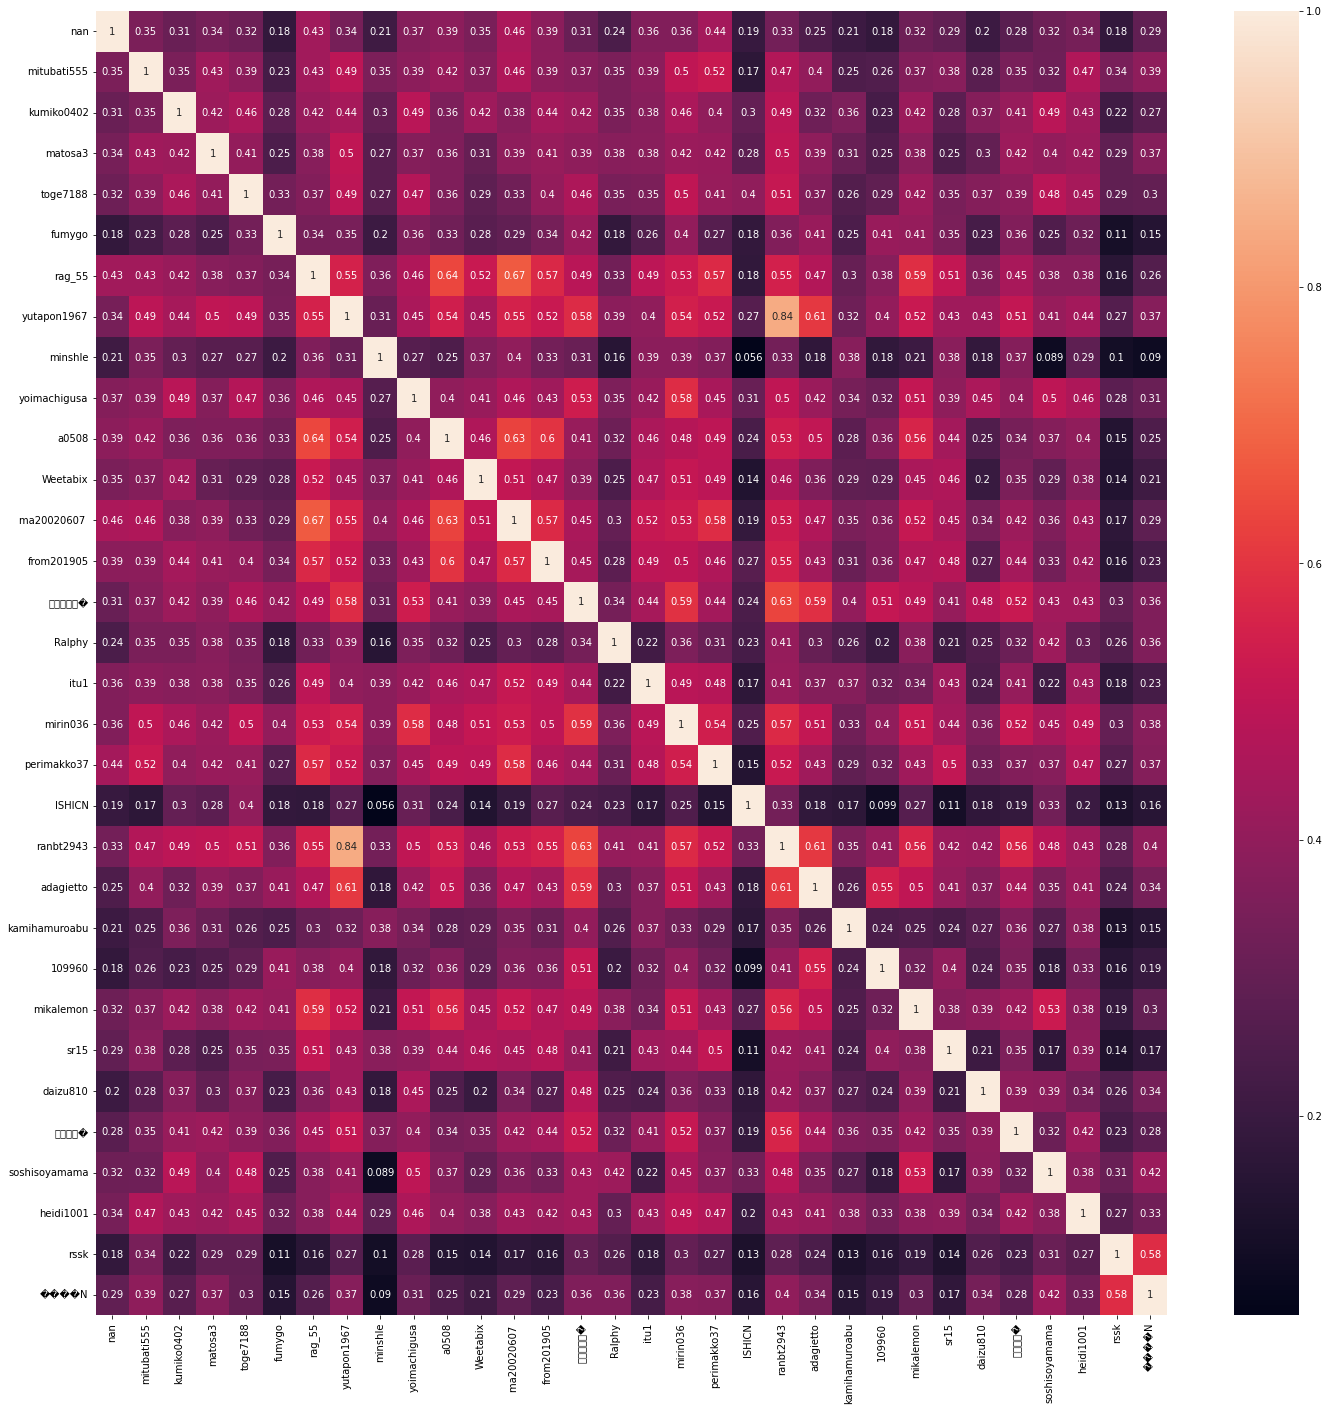

In [4]:
from sklearn.metrics import cohen_kappa_score
all = []
gyou = []
for i in range(len(df.index)):
    for j in range(len(df.index)):
        k = cohen_kappa_score(df.loc[df.index[i]], df.loc[df.index[j]], weights='quadratic')
        gyou.append(k)
    all.append(gyou)
    gyou = []
df_kappa = pd.DataFrame(data = all, index = list(df.index), columns = list(df.index))
pd.set_option('display.max_columns', len(df.index))
plt.figure(figsize=(24,24)) 
sns.heatmap(df_kappa, annot=True)#.get_figure().savefig("./experiment/png/heat.png")

In [5]:
#1回提示した音声のみを抽出
onetime = df.iloc[:, range(60)]
#2回提示した音声を抽出
twotime = df.iloc[:, range(540,600)]
#2回提示した音声を削除
df = df.iloc[:, range(540)]

In [6]:
df1 =  pd.concat([onetime,twotime],axis=1,join='inner')

In [7]:
difference = []
i=0
for i in range(len(onetime.columns)):
    difference.append(np.abs(onetime[onetime.columns[i]]-twotime[twotime.columns[i]]))
DifferenceDF = DataFrame(difference) 
DifferenceDF = DifferenceDF.T
#合計と平均を追加
DifferenceDF['Total'] = DifferenceDF[0:59].sum(axis=1)
DifferenceDF['Mean'] = DifferenceDF['Total']/60

In [8]:
ranking = DifferenceDF.sort_values("Mean")
ranking = ranking.iloc[:,60:]
ranking = ranking.drop(ranking.index[[6,17]])

In [9]:
pd.options.display.precision = 2
index=[]
for i in range(len(ranking.index)):
    x = i+1
    index.append("被験者"+ str(x))
ranking.index=index

In [10]:
i = 0
meiryousa = []
for column in range(int(len(df1.columns)/3)):
    meiryousa.append(df1.loc[:,df1.columns[i]])
    i+=3
meiryousa = DataFrame(meiryousa)
meiryousa = meiryousa.T
i = 1
shitashisa = []
for column in range(int(len(df1.columns)/3)):
    shitashisa.append(df1.loc[:,df1.columns[i]])
    i+=3
shitashisa = DataFrame(shitashisa)
shitashisa =shitashisa.T
i = 2
syakaikaisou = []
for column in range(int(len(df1.columns)/3)):
    syakaikaisou.append(df1.loc[:,df1.columns[i]])
    i+=3
syakaikaisou = DataFrame(syakaikaisou)
syakaikaisou = syakaikaisou.T

In [11]:
#全ての評価者を含む(明瞭さ（I）)

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcI=[]
for i in range(len(meiryousa.index)):
    for j in range(len(meiryousa.columns)):#iは0が180が1が180 jが0123
        dficcI.append([meiryousa.index[i],meiryousa.columns[j],meiryousa.iloc[i,j]])
dficcI = DataFrame(dficcI)
dficcI = dficcI.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [12]:
#全ての評価者を含む(親しさ(F))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcF=[]
for i in range(len(shitashisa.index)):
    for j in range(len(shitashisa.columns)):#iは0が180が1が180 jが0123
        dficcF.append([shitashisa.index[i],shitashisa.columns[j],shitashisa.iloc[i,j]])
dficcF = DataFrame(dficcF)
dficcF = dficcF.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [13]:
#全ての評価者を含む(社会階層(C))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcC=[]
for i in range(len(syakaikaisou.index)):
    for j in range(len(syakaikaisou.columns)):#iは0が180が1が180 jが0123
        dficcC.append([syakaikaisou.index[i],syakaikaisou.columns[j],syakaikaisou.iloc[i,j]])
dficcC = DataFrame(dficcC)
dficcC = dficcC.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [14]:
#排除前

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める
import pingouin as pg

icc = pg.intraclass_corr(data=dficcI, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.29,13.93,39,1200,0.0,"[0.21, 0.42]"
ICC2,Single random raters,0.30,17.85,39,1170,0.0,"[0.21, 0.42]"
ICC3,Single fixed raters,0.35,17.85,39,1170,0.0,"[0.26, 0.48]"
ICC1k,Average raters absolute,0.93,13.93,39,1200,0.0,"[0.89, 0.96]"
ICC2k,Average random raters,0.93,17.85,39,1170,0.0,"[0.89, 0.96]"
ICC3k,Average fixed raters,0.94,17.85,39,1170,0.0,"[0.92, 0.97]"


In [15]:

#排除前

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める
icc = pg.intraclass_corr(data=dficcF, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.29,13.86,39,1200,0.0,"[0.21, 0.41]"
ICC2,Single random raters,0.30,19.85,39,1170,0.0,"[0.21, 0.42]"
ICC3,Single fixed raters,0.38,19.85,39,1170,0.0,"[0.28, 0.51]"
ICC1k,Average raters absolute,0.93,13.86,39,1200,0.0,"[0.89, 0.96]"
ICC2k,Average random raters,0.93,19.85,39,1170,0.0,"[0.89, 0.96]"
ICC3k,Average fixed raters,0.95,19.85,39,1170,0.0,"[0.92, 0.97]"


In [16]:
#排除前

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める
icc = pg.intraclass_corr(data=dficcC, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

/Users/katouryuusei/.pyenv/versions/3.7.10/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.17,7.41,39,1200,0.0,"[0.11, 0.27]"
ICC2,Single random raters,0.18,10.21,39,1170,0.0,"[0.12, 0.27]"
ICC3,Single fixed raters,0.23,10.21,39,1170,0.0,"[0.16, 0.34]"
ICC1k,Average raters absolute,0.86,7.41,39,1200,0.0,"[0.8, 0.92]"
ICC2k,Average random raters,0.87,10.21,39,1170,0.0,"[0.8, 0.92]"
ICC3k,Average fixed raters,0.90,10.21,39,1170,0.0,"[0.85, 0.94]"


In [17]:
#カッパ係数の値を元に除外する
dfhaijo1 =  df1.drop(df1.index[[7,8,19,30,31 ]])

In [17]:
i = 0
meiryousa = []
for column in range(int(len(dfhaijo1.columns)/3)):
    meiryousa.append(dfhaijo1.loc[:,dfhaijo1.columns[i]])
    i+=3
meiryousa = DataFrame(meiryousa)
meiryousa = meiryousa.T
i = 1
shitashisa = []
for column in range(int(len(dfhaijo1.columns)/3)):
    shitashisa.append(dfhaijo1.loc[:,dfhaijo1.columns[i]])
    i+=3
shitashisa = DataFrame(shitashisa)
shitashisa =shitashisa.T
i = 2
syakaikaisou = []
for column in range(int(len(dfhaijo1.columns)/3)):
    syakaikaisou.append(dfhaijo1.loc[:,dfhaijo1.columns[i]])
    i+=3
syakaikaisou = DataFrame(syakaikaisou)
syakaikaisou = syakaikaisou.T

#全ての評価者を含む(明瞭さ（I）)

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcI=[]
for i in range(len(meiryousa.index)):
    for j in range(len(meiryousa.columns)):#iは0が180が1が180 jが0123
        dficcI.append([meiryousa.index[i],meiryousa.columns[j],meiryousa.iloc[i,j]])
dficcI = DataFrame(dficcI)
dficcI = dficcI.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(親しさ(F))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcF=[]
for i in range(len(shitashisa.index)):
    for j in range(len(shitashisa.columns)):#iは0が180が1が180 jが0123
        dficcF.append([shitashisa.index[i],shitashisa.columns[j],shitashisa.iloc[i,j]])
dficcF = DataFrame(dficcF)
dficcF = dficcF.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(社会階層(C))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcC=[]
for i in range(len(syakaikaisou.index)):
    for j in range(len(syakaikaisou.columns)):#iは0が180が1が180 jが0123
        dficcC.append([syakaikaisou.index[i],syakaikaisou.columns[j],syakaikaisou.iloc[i,j]])
dficcC = DataFrame(dficcC)
dficcC = dficcC.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [18]:
#カッパ係数をもとに除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める
import pingouin as pg

icc = pg.intraclass_corr(data=dficcI, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.33,13.54,39,1000,0.0,"[0.24, 0.45]"
ICC2,Single random raters,0.33,16.99,39,975,0.0,"[0.24, 0.46]"
ICC3,Single fixed raters,0.38,16.99,39,975,0.0,"[0.28, 0.51]"
ICC1k,Average raters absolute,0.93,13.54,39,1000,0.0,"[0.89, 0.96]"
ICC2k,Average random raters,0.93,16.99,39,975,0.0,"[0.89, 0.96]"
ICC3k,Average fixed raters,0.94,16.99,39,975,0.0,"[0.91, 0.96]"


In [19]:
#カッパ係数をもとに除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める
import pingouin as pg

icc = pg.intraclass_corr(data=dficcF, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.31,12.86,39,1000,0.0,"[0.22, 0.44]"
ICC2,Single random raters,0.32,15.81,39,975,0.0,"[0.23, 0.44]"
ICC3,Single fixed raters,0.36,15.81,39,975,0.0,"[0.27, 0.49]"
ICC1k,Average raters absolute,0.92,12.86,39,1000,0.0,"[0.88, 0.95]"
ICC2k,Average random raters,0.92,15.81,39,975,0.0,"[0.88, 0.95]"
ICC3k,Average fixed raters,0.94,15.81,39,975,0.0,"[0.9, 0.96]"


In [20]:
#カッパ係数をもとに除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める
import pingouin as pg

icc = pg.intraclass_corr(data=dficcC, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.18,6.6,39,1000,0.0,"[0.12, 0.28]"
ICC2,Single random raters,0.18,8.3,39,975,0.0,"[0.12, 0.28]"
ICC3,Single fixed raters,0.22,8.3,39,975,0.0,"[0.15, 0.33]"
ICC1k,Average raters absolute,0.85,6.6,39,1000,0.0,"[0.77, 0.91]"
ICC2k,Average random raters,0.85,8.3,39,975,0.0,"[0.78, 0.91]"
ICC3k,Average fixed raters,0.88,8.3,39,975,0.0,"[0.82, 0.93]"


In [21]:
#1回目と2回目の評価値の差で除外する(平均3.0以下)
dfhaijo2 =  df1.drop(df1.index[[7,8,19,30,31,  26,11,15  ]])

In [22]:
i = 0
meiryousa = []
for column in range(int(len(dfhaijo2.columns)/3)):
    meiryousa.append(dfhaijo2.loc[:,dfhaijo2.columns[i]])
    i+=3
meiryousa = DataFrame(meiryousa)
meiryousa = meiryousa.T
i = 1
shitashisa = []
for column in range(int(len(dfhaijo2.columns)/3)):
    shitashisa.append(dfhaijo2.loc[:,dfhaijo2.columns[i]])
    i+=3
shitashisa = DataFrame(shitashisa)
shitashisa =shitashisa.T
i = 2
syakaikaisou = []
for column in range(int(len(dfhaijo2.columns)/3)):
    syakaikaisou.append(dfhaijo2.loc[:,dfhaijo2.columns[i]])
    i+=3
syakaikaisou = DataFrame(syakaikaisou)
syakaikaisou = syakaikaisou.T

#全ての評価者を含む(明瞭さ（I）)

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcI=[]
for i in range(len(meiryousa.index)):
    for j in range(len(meiryousa.columns)):#iは0が180が1が180 jが0123
        dficcI.append([meiryousa.index[i],meiryousa.columns[j],meiryousa.iloc[i,j]])
dficcI = DataFrame(dficcI)
dficcI = dficcI.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(親しさ(F))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcF=[]
for i in range(len(shitashisa.index)):
    for j in range(len(shitashisa.columns)):#iは0が180が1が180 jが0123
        dficcF.append([shitashisa.index[i],shitashisa.columns[j],shitashisa.iloc[i,j]])
dficcF = DataFrame(dficcF)
dficcF = dficcF.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(社会階層(C))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcC=[]
for i in range(len(syakaikaisou.index)):
    for j in range(len(syakaikaisou.columns)):#iは0が180が1が180 jが0123
        dficcC.append([syakaikaisou.index[i],syakaikaisou.columns[j],syakaikaisou.iloc[i,j]])
dficcC = DataFrame(dficcC)
dficcC = dficcC.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [23]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcI, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.29,12.59,39,1080,0.0,"[0.21, 0.42]"
ICC2,Single random raters,0.30,16.46,39,1053,0.0,"[0.21, 0.42]"
ICC3,Single fixed raters,0.36,16.46,39,1053,0.0,"[0.26, 0.48]"
ICC1k,Average raters absolute,0.92,12.59,39,1080,0.0,"[0.88, 0.95]"
ICC2k,Average random raters,0.92,16.46,39,1053,0.0,"[0.88, 0.95]"
ICC3k,Average fixed raters,0.94,16.46,39,1053,0.0,"[0.91, 0.96]"


In [24]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcF, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.31,13.80,39,1080,0.0,"[0.23, 0.44]"
ICC2,Single random raters,0.32,19.08,39,1053,0.0,"[0.23, 0.45]"
ICC3,Single fixed raters,0.39,19.08,39,1053,0.0,"[0.29, 0.52]"
ICC1k,Average raters absolute,0.93,13.80,39,1080,0.0,"[0.89, 0.96]"
ICC2k,Average random raters,0.93,19.08,39,1053,0.0,"[0.89, 0.96]"
ICC3k,Average fixed raters,0.95,19.08,39,1053,0.0,"[0.92, 0.97]"


In [25]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcC, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.17,6.85,39,1080,0.0,"[0.11, 0.27]"
ICC2,Single random raters,0.18,10.22,39,1053,0.0,"[0.12, 0.28]"
ICC3,Single fixed raters,0.25,10.22,39,1053,0.0,"[0.17, 0.36]"
ICC1k,Average raters absolute,0.85,6.85,39,1080,0.0,"[0.78, 0.91]"
ICC2k,Average random raters,0.86,10.22,39,1053,0.0,"[0.79, 0.92]"
ICC3k,Average fixed raters,0.90,10.22,39,1053,0.0,"[0.85, 0.94]"


In [26]:
#1回目と2回目の評価値の差で除外する(平均1.35以下)
dfhaijo3 =  df1.drop(df1.index[[7,8,19,30,31,  26,11,15  , 17,2,25,4,28,9]])

In [27]:
i = 0
meiryousa = []
for column in range(int(len(dfhaijo3.columns)/3)):
    meiryousa.append(dfhaijo3.loc[:,dfhaijo3.columns[i]])
    i+=3
meiryousa = DataFrame(meiryousa)
meiryousa = meiryousa.T
i = 1
shitashisa = []
for column in range(int(len(dfhaijo3.columns)/3)):
    shitashisa.append(dfhaijo3.loc[:,dfhaijo3.columns[i]])
    i+=3
shitashisa = DataFrame(shitashisa)
shitashisa =shitashisa.T
i = 2
syakaikaisou = []
for column in range(int(len(dfhaijo3.columns)/3)):
    syakaikaisou.append(dfhaijo3.loc[:,dfhaijo3.columns[i]])
    i+=3
syakaikaisou = DataFrame(syakaikaisou)
syakaikaisou = syakaikaisou.T

#全ての評価者を含む(明瞭さ（I）)

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcI=[]
for i in range(len(meiryousa.index)):
    for j in range(len(meiryousa.columns)):#iは0が180が1が180 jが0123
        dficcI.append([meiryousa.index[i],meiryousa.columns[j],meiryousa.iloc[i,j]])
dficcI = DataFrame(dficcI)
dficcI = dficcI.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(親しさ(F))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcF=[]
for i in range(len(shitashisa.index)):
    for j in range(len(shitashisa.columns)):#iは0が180が1が180 jが0123
        dficcF.append([shitashisa.index[i],shitashisa.columns[j],shitashisa.iloc[i,j]])
dficcF = DataFrame(dficcF)
dficcF = dficcF.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(社会階層(C))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcC=[]
for i in range(len(syakaikaisou.index)):
    for j in range(len(syakaikaisou.columns)):#iは0が180が1が180 jが0123
        dficcC.append([syakaikaisou.index[i],syakaikaisou.columns[j],syakaikaisou.iloc[i,j]])
dficcC = DataFrame(dficcC)
dficcC = dficcC.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [28]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcI, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.25,8.50,39,840,0.0,"[0.17, 0.37]"
ICC2,Single random raters,0.26,11.55,39,819,0.0,"[0.18, 0.38]"
ICC3,Single fixed raters,0.32,11.55,39,819,0.0,"[0.23, 0.45]"
ICC1k,Average raters absolute,0.88,8.50,39,840,0.0,"[0.82, 0.93]"
ICC2k,Average random raters,0.89,11.55,39,819,0.0,"[0.83, 0.93]"
ICC3k,Average fixed raters,0.91,11.55,39,819,0.0,"[0.87, 0.95]"


In [29]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcF, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.28,9.71,39,840,0.0,"[0.2, 0.41]"
ICC2,Single random raters,0.29,14.29,39,819,0.0,"[0.2, 0.42]"
ICC3,Single fixed raters,0.38,14.29,39,819,0.0,"[0.28, 0.51]"
ICC1k,Average raters absolute,0.90,9.71,39,840,0.0,"[0.84, 0.94]"
ICC2k,Average random raters,0.90,14.29,39,819,0.0,"[0.85, 0.94]"
ICC3k,Average fixed raters,0.93,14.29,39,819,0.0,"[0.89, 0.96]"


In [30]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcC, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.20,6.54,39,840,0.0,"[0.13, 0.31]"
ICC2,Single random raters,0.21,10.10,39,819,0.0,"[0.14, 0.32]"
ICC3,Single fixed raters,0.29,10.10,39,819,0.0,"[0.21, 0.42]"
ICC1k,Average raters absolute,0.85,6.54,39,840,0.0,"[0.77, 0.91]"
ICC2k,Average random raters,0.85,10.10,39,819,0.0,"[0.78, 0.91]"
ICC3k,Average fixed raters,0.90,10.10,39,819,0.0,"[0.85, 0.94]"


In [31]:
#1回目と2回目の評価値の差で除外する(平均2.5以下)
dfhaijo4 =  df1.drop(df1.index[[7,8,19,30,31,  26,11,15  , 17,2,25,4,28,9    , 29,18,20,1,14]])

In [32]:
i = 0
meiryousa = []
for column in range(int(len(dfhaijo4.columns)/3)):
    meiryousa.append(dfhaijo4.loc[:,dfhaijo4.columns[i]])
    i+=3
meiryousa = DataFrame(meiryousa)
meiryousa = meiryousa.T
i = 1
shitashisa = []
for column in range(int(len(dfhaijo4.columns)/3)):
    shitashisa.append(dfhaijo4.loc[:,dfhaijo4.columns[i]])
    i+=3
shitashisa = DataFrame(shitashisa)
shitashisa =shitashisa.T
i = 2
syakaikaisou = []
for column in range(int(len(dfhaijo4.columns)/3)):
    syakaikaisou.append(dfhaijo4.loc[:,dfhaijo4.columns[i]])
    i+=3
syakaikaisou = DataFrame(syakaikaisou)
syakaikaisou = syakaikaisou.T

#全ての評価者を含む(明瞭さ（I）)

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcI=[]
for i in range(len(meiryousa.index)):
    for j in range(len(meiryousa.columns)):#iは0が180が1が180 jが0123
        dficcI.append([meiryousa.index[i],meiryousa.columns[j],meiryousa.iloc[i,j]])
dficcI = DataFrame(dficcI)
dficcI = dficcI.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(親しさ(F))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcF=[]
for i in range(len(shitashisa.index)):
    for j in range(len(shitashisa.columns)):#iは0が180が1が180 jが0123
        dficcF.append([shitashisa.index[i],shitashisa.columns[j],shitashisa.iloc[i,j]])
dficcF = DataFrame(dficcF)
dficcF = dficcF.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(社会階層(C))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcC=[]
for i in range(len(syakaikaisou.index)):
    for j in range(len(syakaikaisou.columns)):#iは0が180が1が180 jが0123
        dficcC.append([syakaikaisou.index[i],syakaikaisou.columns[j],syakaikaisou.iloc[i,j]])
dficcC = DataFrame(dficcC)
dficcC = dficcC.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [33]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcI, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.23,6.21,39,640,0.0,"[0.15, 0.35]"
ICC2,Single random raters,0.24,8.22,39,624,0.0,"[0.16, 0.36]"
ICC3,Single fixed raters,0.30,8.22,39,624,0.0,"[0.21, 0.43]"
ICC1k,Average raters absolute,0.84,6.21,39,640,0.0,"[0.76, 0.9]"
ICC2k,Average random raters,0.84,8.22,39,624,0.0,"[0.76, 0.91]"
ICC3k,Average fixed raters,0.88,8.22,39,624,0.0,"[0.82, 0.93]"


In [34]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcF, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.27,7.35,39,640,0.0,"[0.18, 0.4]"
ICC2,Single random raters,0.28,12.92,39,624,0.0,"[0.18, 0.42]"
ICC3,Single fixed raters,0.41,12.92,39,624,0.0,"[0.31, 0.55]"
ICC1k,Average raters absolute,0.86,7.35,39,640,0.0,"[0.79, 0.92]"
ICC2k,Average random raters,0.87,12.92,39,624,0.0,"[0.79, 0.93]"
ICC3k,Average fixed raters,0.92,12.92,39,624,0.0,"[0.88, 0.95]"


In [35]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcC, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.17,4.38,39,640,0.0,"[0.1, 0.27]"
ICC2,Single random raters,0.18,7.46,39,624,0.0,"[0.11, 0.29]"
ICC3,Single fixed raters,0.28,7.46,39,624,0.0,"[0.19, 0.4]"
ICC1k,Average raters absolute,0.77,4.38,39,640,0.0,"[0.65, 0.86]"
ICC2k,Average random raters,0.79,7.46,39,624,0.0,"[0.68, 0.88]"
ICC3k,Average fixed raters,0.87,7.46,39,624,0.0,"[0.8, 0.92]"


In [41]:
#1回目と2回目の評価値の差で除外する(平均2.0以下)
dfhaijo5 =  df1.drop(df1.index[[ 7,8,19,30,31,  26,11,15  , 17,2,25,4,28,9    , 29,18,20,1,14    ,6,12,16,22,27,24 ]])

In [42]:
i = 0
meiryousa = []
for column in range(int(len(dfhaijo5.columns)/3)):
    meiryousa.append(dfhaijo5.loc[:,dfhaijo5.columns[i]])
    i+=3
meiryousa = DataFrame(meiryousa)
meiryousa = meiryousa.T
i = 1
shitashisa = []
for column in range(int(len(dfhaijo5.columns)/3)):
    shitashisa.append(dfhaijo5.loc[:,dfhaijo5.columns[i]])
    i+=3
shitashisa = DataFrame(shitashisa)
shitashisa =shitashisa.T
i = 2
syakaikaisou = []
for column in range(int(len(dfhaijo5.columns)/3)):
    syakaikaisou.append(dfhaijo5.loc[:,dfhaijo5.columns[i]])
    i+=3
syakaikaisou = DataFrame(syakaikaisou)
syakaikaisou = syakaikaisou.T

#全ての評価者を含む(明瞭さ（I）)

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcI=[]
for i in range(len(meiryousa.index)):
    for j in range(len(meiryousa.columns)):#iは0が180が1が180 jが0123
        dficcI.append([meiryousa.index[i],meiryousa.columns[j],meiryousa.iloc[i,j]])
dficcI = DataFrame(dficcI)
dficcI = dficcI.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(親しさ(F))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcF=[]
for i in range(len(shitashisa.index)):
    for j in range(len(shitashisa.columns)):#iは0が180が1が180 jが0123
        dficcF.append([shitashisa.index[i],shitashisa.columns[j],shitashisa.iloc[i,j]])
dficcF = DataFrame(dficcF)
dficcF = dficcF.rename(columns={0: 'Name',1:'Question',2:'Scores'})

#全ての評価者を含む(社会階層(C))

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficcC=[]
for i in range(len(syakaikaisou.index)):
    for j in range(len(syakaikaisou.columns)):#iは0が180が1が180 jが0123
        dficcC.append([syakaikaisou.index[i],syakaikaisou.columns[j],syakaikaisou.iloc[i,j]])
dficcC = DataFrame(dficcC)
dficcC = dficcC.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [43]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcI, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.17,3.19,39,400,0.0,"[0.09, 0.28]"
ICC2,Single random raters,0.19,4.95,39,390,0.0,"[0.11, 0.31]"
ICC3,Single fixed raters,0.26,4.95,39,390,0.0,"[0.17, 0.4]"
ICC1k,Average raters absolute,0.69,3.19,39,400,0.0,"[0.52, 0.81]"
ICC2k,Average random raters,0.72,4.95,39,390,0.0,"[0.56, 0.83]"
ICC3k,Average fixed raters,0.80,4.95,39,390,0.0,"[0.69, 0.88]"


In [44]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcF, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.22,4.06,39,400,0.0,"[0.13, 0.35]"
ICC2,Single random raters,0.25,9.56,39,390,0.0,"[0.13, 0.4]"
ICC3,Single fixed raters,0.44,9.56,39,390,0.0,"[0.32, 0.58]"
ICC1k,Average raters absolute,0.75,4.06,39,400,0.0,"[0.62, 0.85]"
ICC2k,Average random raters,0.78,9.56,39,390,0.0,"[0.63, 0.88]"
ICC3k,Average fixed raters,0.90,9.56,39,390,0.0,"[0.84, 0.94]"


In [45]:
#1回目と2回目の評価値の差で除外

#尺度の妥当性をはかる
#適当な評価者は除いた値で求める or 排除前と排除後を比べる
#ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficcC, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.08,1.97,39,400,1.00e-03,"[0.03, 0.17]"
ICC2,Single random raters,0.12,4.08,39,390,0.00e+00,"[0.06, 0.22]"
ICC3,Single fixed raters,0.22,4.08,39,390,0.00e+00,"[0.13, 0.35]"
ICC1k,Average raters absolute,0.49,1.97,39,400,1.00e-03,"[0.23, 0.7]"
ICC2k,Average random raters,0.60,4.08,39,390,0.00e+00,"[0.39, 0.76]"
ICC3k,Average fixed raters,0.76,4.08,39,390,0.00e+00,"[0.62, 0.85]"


# 尺度全体

In [18]:
#全ての評価者を含む(正しくは三尺度それぞれの値を求めるdatouseihyouka.ipynbにある)

#intraclass_corr関数を使うため、データフレームの形を作り直す
dficc=[]
for i in range(len(df1.index)):
    for j in range(len(df1.columns)):#iは0が180が1が180 jが0123
        dficc.append([df1.index[i],df1.columns[j],df1.iloc[i,j]])
dficc = DataFrame(dficc)
dficc = dficc.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [19]:
# 排除前

# 尺度の妥当性をはかる
# 適当な評価者は除いた値で求める or 排除前と排除後を比べる
# ICC(級内相関係数)を求める
import pingouin as pg

icc = pg.intraclass_corr(data=dficc, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.37,19.13,119,3600,0.0,"[0.31, 0.44]"
ICC2,Single random raters,0.37,23.11,119,3570,0.0,"[0.31, 0.44]"
ICC3,Single fixed raters,0.42,23.11,119,3570,0.0,"[0.36, 0.49]"
ICC1k,Average raters absolute,0.95,19.13,119,3600,0.0,"[0.93, 0.96]"
ICC2k,Average random raters,0.95,23.11,119,3570,0.0,"[0.93, 0.96]"
ICC3k,Average fixed raters,0.96,23.11,119,3570,0.0,"[0.94, 0.97]"


In [20]:
#カッパ係数の値を元に除外する
dfhaijo =  df1.drop(df1.index[[7,8,19,30,31 ]])

In [21]:
#カッパ係数の値を元に除外する
#intraclass_corr関数を使うため、データフレームの形を作り直す
dficchaijo=[]
for i in range(len(dfhaijo.index)):
    for j in range(len(dfhaijo.columns)):#iは0が180が1が180 jが0123
        dficchaijo.append([dfhaijo.index[i],dfhaijo.columns[j],dfhaijo.iloc[i,j]])
dficchaijo = DataFrame(dficchaijo)
dficchaijo = dficchaijo.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [22]:
# カッパ係数をもとに除外

# 尺度の妥当性をはかる
# 適当な評価者は除いた値で求める or 排除前と排除後を比べる
# ICC(級内相関係数)を求める
import pingouin as pg

icc = pg.intraclass_corr(data=dficchaijo, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.40,18.05,119,3000,0.0,"[0.34, 0.47]"
ICC2,Single random raters,0.40,20.25,119,2975,0.0,"[0.34, 0.47]"
ICC3,Single fixed raters,0.42,20.25,119,2975,0.0,"[0.36, 0.5]"
ICC1k,Average raters absolute,0.94,18.05,119,3000,0.0,"[0.93, 0.96]"
ICC2k,Average random raters,0.94,20.25,119,2975,0.0,"[0.93, 0.96]"
ICC3k,Average fixed raters,0.95,20.25,119,2975,0.0,"[0.94, 0.96]"


In [23]:
#1回目と2回目の評価値の差で除外する(平均1.6以下)
dfhaijo2 =  df1.drop(df1.index[[7,8,19,30,31,  26,11,15  ]])

In [24]:
#1回目と2回目の評価値の差で除外する
#intraclass_corr関数を使うため、データフレームの形を作り直す
dficchaijo2=[]
for i in range(len(dfhaijo2.index)):
    for j in range(len(dfhaijo2.columns)):#iは0が180が1が180 jが0123
        dficchaijo2.append([dfhaijo2.index[i],dfhaijo2.columns[j],dfhaijo2.iloc[i,j]])
dficchaijo2 = DataFrame(dficchaijo2)
dficchaijo2 = dficchaijo2.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [25]:
# 1回目と2回目の評価値の差で除外

# 尺度の妥当性をはかる
# 適当な評価者は除いた値で求める or 排除前と排除後を比べる
# ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficchaijo2, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.42,17.49,119,2640,0.0,"[0.36, 0.49]"
ICC2,Single random raters,0.42,19.88,119,2618,0.0,"[0.36, 0.49]"
ICC3,Single fixed raters,0.45,19.88,119,2618,0.0,"[0.39, 0.52]"
ICC1k,Average raters absolute,0.94,17.49,119,2640,0.0,"[0.93, 0.96]"
ICC2k,Average random raters,0.94,19.88,119,2618,0.0,"[0.93, 0.96]"
ICC3k,Average fixed raters,0.95,19.88,119,2618,0.0,"[0.94, 0.96]"


In [26]:
#1回目と2回目の評価値の差で除外する(平均1.35以下)
dfhaijo3 =  df1.drop(df1.index[[7,8,19,30,31,  26,11,15  , 17,2,25,4,28,9]])

In [27]:
#1回目と2回目の評価値の差で除外する
#intraclass_corr関数を使うため、データフレームの形を作り直す
dficchaijo3=[]
for i in range(len(dfhaijo3.index)):
    for j in range(len(dfhaijo3.columns)):#iは0が180が1が180 jが0123
        dficchaijo3.append([dfhaijo3.index[i],dfhaijo3.columns[j],dfhaijo3.iloc[i,j]])
dficchaijo3 = DataFrame(dficchaijo3)
dficchaijo3 = dficchaijo3.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [28]:
# 1回目と2回目の評価値の差で除外

# 尺度の妥当性をはかる
# 適当な評価者は除いた値で求める or 排除前と排除後を比べる
# ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficchaijo3, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.44,14.24,119,1920,0.0,"[0.37, 0.51]"
ICC2,Single random raters,0.44,16.91,119,1904,0.0,"[0.37, 0.52]"
ICC3,Single fixed raters,0.48,16.91,119,1904,0.0,"[0.42, 0.56]"
ICC1k,Average raters absolute,0.93,14.24,119,1920,0.0,"[0.91, 0.95]"
ICC2k,Average random raters,0.93,16.91,119,1904,0.0,"[0.91, 0.95]"
ICC3k,Average fixed raters,0.94,16.91,119,1904,0.0,"[0.92, 0.96]"


In [29]:
#1回目と2回目の評価値の差で除外する(平均2.5以下)
dfhaijo4 =  df1.drop(df1.index[[ 7,8,19,30,31, 26,11,15  , 17,2,25,4,28,9    , 29,18,20,1,14]])

In [30]:
#1回目と2回目の評価値の差で除外する
#intraclass_corr関数を使うため、データフレームの形を作り直す
dficchaijo4=[]
for i in range(len(dfhaijo4.index)):
    for j in range(len(dfhaijo4.columns)):#iは0が180が1が180 jが0123
        dficchaijo4.append([dfhaijo4.index[i],dfhaijo4.columns[j],dfhaijo4.iloc[i,j]])
dficchaijo4 = DataFrame(dficchaijo4)
dficchaijo4 = dficchaijo4.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [31]:
# 1回目と2回目の評価値の差で除外

# 尺度の妥当性をはかる
# 適当な評価者は除いた値で求める or 排除前と排除後を比べる
# ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficchaijo4, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.44,10.30,119,1320,0.0,"[0.37, 0.51]"
ICC2,Single random raters,0.44,12.65,119,1309,0.0,"[0.36, 0.52]"
ICC3,Single fixed raters,0.49,12.65,119,1309,0.0,"[0.42, 0.57]"
ICC1k,Average raters absolute,0.90,10.30,119,1320,0.0,"[0.88, 0.93]"
ICC2k,Average random raters,0.91,12.65,119,1309,0.0,"[0.87, 0.93]"
ICC3k,Average fixed raters,0.92,12.65,119,1309,0.0,"[0.9, 0.94]"


In [32]:
#1回目と2回目の評価値の差で除外する(平均1.0以下)
dfhaijo5 =  df1.drop(df1.index[[7,8,19,30,31,  26,11,15  , 17,2,25,4,28,9    , 29,18,20,1,14    ,6,12,16,22,27,24 ]])

In [33]:
#1回目と2回目の評価値の差で除外する
#intraclass_corr関数を使うため、データフレームの形を作り直す
dficchaijo5=[]
for i in range(len(dfhaijo5.index)):
    for j in range(len(dfhaijo5.columns)):#iは0が180が1が180 jが0123
        dficchaijo5.append([dfhaijo5.index[i],dfhaijo5.columns[j],dfhaijo5.iloc[i,j]])
dficchaijo5 = DataFrame(dficchaijo5)
dficchaijo5 = dficchaijo5.rename(columns={0: 'Name',1:'Question',2:'Scores'})

In [34]:
# 1回目と2回目の評価値の差で除外

# 尺度の妥当性をはかる
# 適当な評価者は除いた値で求める or 排除前と排除後を比べる
# ICC(級内相関係数)を求める

icc = pg.intraclass_corr(data=dficchaijo5, targets="Question", raters="Name",
                         ratings="Scores").round(3)
icc.set_index("Type")


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.42,5.31,119,600,0.0,"[0.34, 0.5]"
ICC2,Single random raters,0.44,7.94,119,595,0.0,"[0.3, 0.56]"
ICC3,Single fixed raters,0.54,7.94,119,595,0.0,"[0.46, 0.62]"
ICC1k,Average raters absolute,0.81,5.31,119,600,0.0,"[0.75, 0.86]"
ICC2k,Average random raters,0.82,7.94,119,595,0.0,"[0.72, 0.88]"
ICC3k,Average fixed raters,0.87,7.94,119,595,0.0,"[0.84, 0.91]"
